In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv("D:/AI Trends/credit_rating_prediction_dataset.csv",index_col=0)
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
id,,,,,,,,,,,,,,,,,,,,,
1,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
2,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
3,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
4,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
5,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
997,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
998,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good


In [3]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exis

In [5]:
#Split the dataset into labels and target variable
X = df.drop("class", axis=1)
y = df["class"]

In [6]:
label = LabelEncoder()
y = label.fit_transform(y)

In [7]:
#Split data into training amd testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24, test_size=0.2)

In [8]:
features_to_scale = ["duration", "credit_amount","installment_commitment", "residence_since",
                     "age", "num_dependents","existing_credits"]

In [9]:
scaler = StandardScaler()
scaler.fit(X_train[features_to_scale]) #Fit on all specified features

StandardScaler()

In [10]:
X_train[features_to_scale] =scaler.transform(X_train[features_to_scale])
X_test[features_to_scale] =scaler.transform(X_test[features_to_scale])

In [11]:
features_to_encode = ["checking_status", "credit_history", "purpose","savings_status", "employment",
                     "personal_status", "other_parties", "property_magnitude","own_telephone",
                     "foreign_worker", "job","other_payment_plans", "housing"]

In [12]:
label = LabelEncoder()
for feature in features_to_encode:
    X_train[feature] = label.fit_transform(X_train[feature])
    X_test[feature] = label.fit_transform(X_test[feature])    

In [13]:
X_train[features_to_encode] = X_train[features_to_encode].apply(label.fit_transform)
X_test[features_to_encode] = X_test[features_to_encode].apply(label.fit_transform)

In [45]:
X_train

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
id,,,,,,,,,,,,,,,,,,,,
902,3,-0.064306,1,4,0.078442,4,2,-0.862742,1,2,1.072577,3,0.746649,1,1,1.004099,1,-0.415957,1,1
804,3,-0.723857,1,6,-0.800552,4,3,0.916108,3,2,1.072577,0,-0.044386,1,1,1.004099,1,-0.415957,0,1
856,3,0.265469,3,4,-0.626085,0,2,0.916108,2,2,0.174083,3,-0.220171,1,1,-0.705006,1,-0.415957,1,1
393,1,1.254795,3,4,-0.004238,2,1,-0.862742,3,2,1.072577,2,0.307185,0,0,-0.705006,0,2.404093,1,1
882,3,0.265469,3,9,2.107589,4,0,-0.862742,1,2,1.072577,2,1.098220,1,0,-0.705006,1,-0.415957,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0,-0.229194,1,0,-0.481396,4,0,0.916108,2,2,1.072577,3,-0.659635,0,1,1.004099,1,-0.415957,0,1
344,0,-0.229194,3,0,0.412662,2,3,-1.752167,3,0,-1.622904,3,-0.220171,0,1,-0.705006,0,-0.415957,1,1
193,0,0.512801,3,0,0.229086,2,0,0.916108,3,2,-0.724411,0,0.043507,1,1,-0.705006,1,2.404093,1,1


In [15]:
#Perform logistic regression (classification)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_test_pred = model.predict(X_test)

In [17]:
comparison = pd.DataFrame({"actual": y_test, "predicted": y_test_pred})

In [18]:
print(comparison[0:15])
print(comparison[100:])

    actual  predicted
0        0          0
1        1          1
2        1          1
3        1          1
4        0          0
5        0          1
6        1          1
7        0          1
8        0          0
9        1          1
10       1          0
11       1          1
12       0          1
13       1          1
14       0          1
     actual  predicted
100       1          1
101       0          0
102       1          1
103       1          1
104       1          1
..      ...        ...
195       0          1
196       1          1
197       1          1
198       1          1
199       1          1

[100 rows x 2 columns]


In [19]:
accuracy = accuracy_score(y_test, y_test_pred)
print(accuracy)

0.76


In [20]:
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)

[[ 26  36]
 [ 12 126]]


In [21]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.68      0.42      0.52        62
           1       0.78      0.91      0.84       138

    accuracy                           0.76       200
   macro avg       0.73      0.67      0.68       200
weighted avg       0.75      0.76      0.74       200



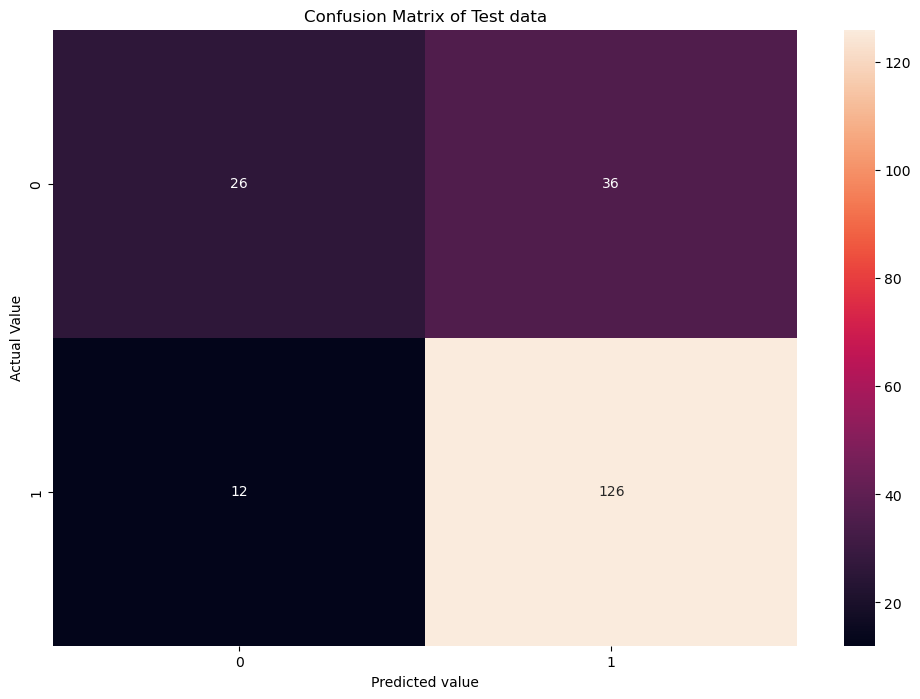

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion, annot=True, fmt='d')
plt.title('Confusion Matrix of Test data')
plt.xlabel('Predicted value')
plt.ylabel('Actual Value')
plt.show();

In [23]:
TN = confusion[0][0]
TP = confusion[1][1]
FP = confusion[0][1]
FN = confusion[1][0]

In [24]:
recall = TP/(TP+FN)
print(recall)

0.9130434782608695


In [25]:
precision = TP/(TP+FP)
print(precision)

0.7777777777777778


In [26]:
specificity = TN/(TN+FP)
print(specificity)

0.41935483870967744


In [27]:
accuracy = (TP+TN)/(TP+FP+TN+FN)
print(accuracy)

0.76


In [28]:
#Make new prediction

print("*** MAking new predicitions on new data *****")

new_data = np.array([
    [0, 16, 1, 0 , 80 , 1, 0, 54, 0, 1, 70, 0, 45, 0, 1, 29, 0, 100, 1, 0],
    [0, 15, 1, 0 , 45 , 0, 1, 14, 1, 0, 16, 1, 69, 0, 1, 92, 0, 88, 0, 1]
])

*** MAking new predicitions on new data *****


In [29]:
new_data_df = pd.DataFrame(data= new_data, columns = X_train.columns)

In [30]:
new_data_df = new_data_df.fillna(0)
print(new_data_df)

   checking_status  duration  credit_history  purpose  credit_amount  \
0                0        16               1        0             80   
1                0        15               1        0             45   

   savings_status  employment  installment_commitment  personal_status  \
0               1           0                      54                0   
1               0           1                      14                1   

   other_parties  residence_since  property_magnitude  age  \
0              1               70                   0   45   
1              0               16                   1   69   

   other_payment_plans  housing  existing_credits  job  num_dependents  \
0                    0        1                29    0             100   
1                    0        1                92    0              88   

   own_telephone  foreign_worker  
0              1               0  
1              0               1  


In [31]:
new_data_scaled = scaler.transform(new_data_df[features_to_scale])
new_data_scaled = pd.DataFrame(new_data_scaled, columns = features_to_scale)
print(new_data_scaled)

   duration  credit_amount  installment_commitment  residence_since       age  \
0 -0.394081      -1.114453               45.387353        60.373158  0.834542   
1 -0.476525      -1.126715                9.810357        11.854501  2.943969   

   num_dependents  existing_credits  
0      278.768985         47.149940  
1      244.928386        154.823568  


In [32]:
new_data_categ = new_data_df.drop(features_to_scale, axis = 1)
new_data_categ

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker
0,0,1,0,1,0,0,1,0,0,1,0,1,0
1,0,1,0,0,1,1,0,1,0,1,0,0,1


In [33]:
predict_df = pd.concat([new_data_scaled, new_data_categ], axis=1)
predict_df = predict_df[['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker']]
predict_df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,0,-0.394081,1,0,-1.114453,1,0,45.387353,0,1,60.373158,0,0.834542,0,1,47.149940,0,278.768985,1,0
1,0,-0.476525,1,0,-1.126715,0,1,9.810357,1,0,11.854501,1,2.943969,0,1,154.823568,0,244.928386,0,1


In [34]:
prediction = model.predict(predict_df)
print(prediction)

[0 0]


In [35]:
# Saving Model

import joblib

joblib.dump(model, 'final_creditrating_model.pkl')

# print(X)
# print(X.columns)
# print(list(X.columns))

['final_creditrating_model.pkl']

In [36]:
joblib.dump(list(X.columns), 'creditrating_column_names.pkl')

['creditrating_column_names.pkl']

In [37]:
#Loading model (Model Persistance)

col_names = joblib.load('creditrating_column_names.pkl')
print(col_names)

['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker']


In [38]:
loaded_model = joblib.load('final_creditrating_model.pkl')

In [49]:
# Make new predictions using loaded Model

print("*** Making predictions using Loaded Model for New data ***")
predict_df = X_train[1:2]
predict_df

*** Making predictions using Loaded Model for New data ***


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
id,,,,,,,,,,,,,,,,,,,,
804,3,-0.723857,1,6,-0.800552,4,3,0.916108,3,2,1.072577,0,-0.044386,1,1,1.004099,1,-0.415957,0,1


In [52]:
new_creditratings_pred = loaded_model.predict(predict_df)
print(new_creditratings_pred)

[1]
